# Enviroment setup and data loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('reviews.csv')

In [4]:
print(df.head())

                     business_name    author_name  \
0  Haci'nin Yeri - Yigit Lokantasi    Gulsum Akar   
1  Haci'nin Yeri - Yigit Lokantasi  Oguzhan Cetin   
2  Haci'nin Yeri - Yigit Lokantasi     Yasin Kuyu   
3  Haci'nin Yeri - Yigit Lokantasi     Orhan Kapu   
4  Haci'nin Yeri - Yigit Lokantasi     Ozgur Sati   

                                                text  \
0  We went to Marmaris with my wife for a holiday...   
1  During my holiday in Marmaris we ate here to f...   
2  Prices are very affordable. The menu in the ph...   
3  Turkey's cheapest artisan restaurant and its f...   
4  I don't know what you will look for in terms o...   

                                               photo  rating  \
0         dataset/taste/hacinin_yeri_gulsum_akar.png       5   
1        dataset/menu/hacinin_yeri_oguzhan_cetin.png       4   
2  dataset/outdoor_atmosphere/hacinin_yeri_yasin_...       3   
3  dataset/indoor_atmosphere/hacinin_yeri_orhan_k...       5   
4           dataset/menu

# Exploring the data

In [5]:
#checking dataframe work summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [6]:
#checking statistical summary 
df.describe()

,rating
count,1100.000000
mean,3.912727
std,1.218459
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
#checking missing values
df.isnull().sum()

business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64

In [8]:
#checking duplicate rows
df.duplicated().sum()

np.int64(0)

# Data cleaning

In [9]:
#Removing missing value rows
df.dropna(inplace=True)

In [10]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
#correcting the datatypes
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [12]:
#final check
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64

# Data analysing (EDA)

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [15]:
#seeing rating distribution
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

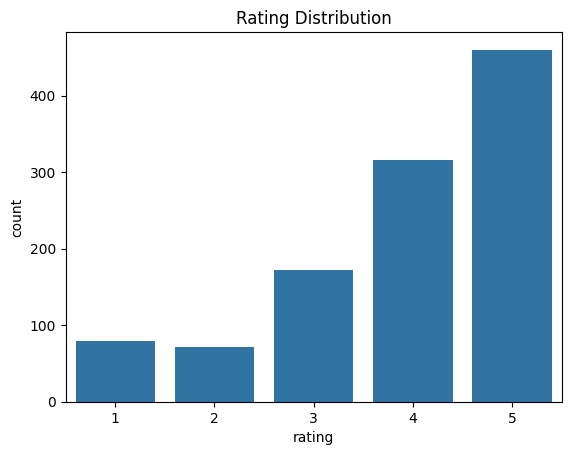

In [16]:
#making the count plot of rating distribution
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.show()

In [17]:
print(df.columns)

Index(['business_name', 'author_name', 'text', 'photo', 'rating',
       'rating_category'],
      dtype='object')


In [18]:
#analyzing review lengths
df['review_length'] = df['text'].apply(len)

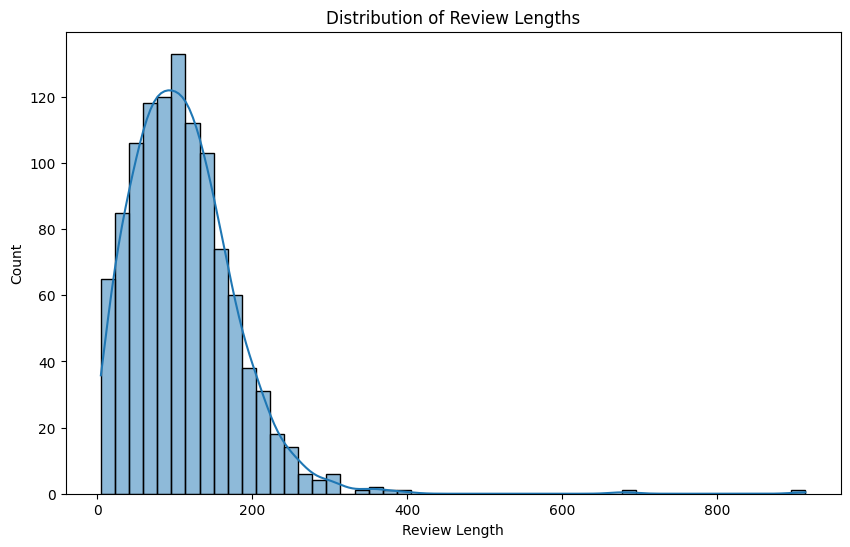

In [19]:
#making distribution plot of review length
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

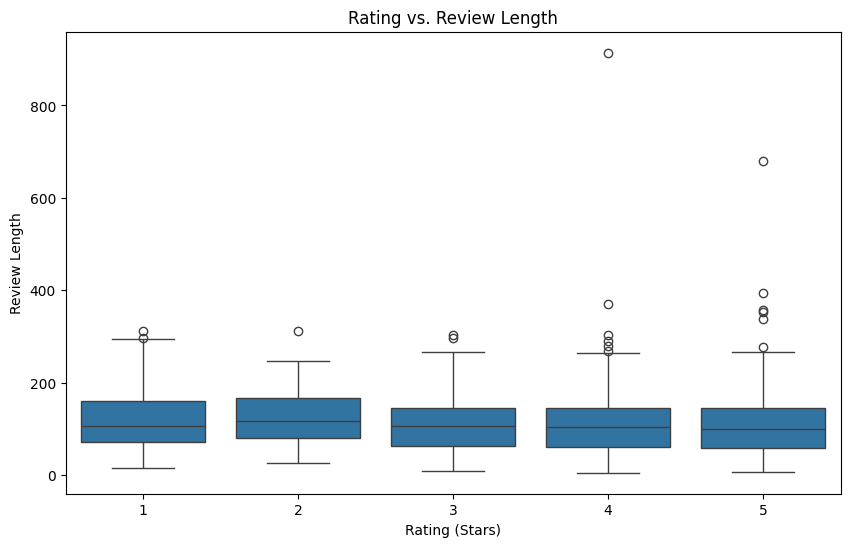

In [20]:
#making scatter plot between review length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df)
plt.title('Rating vs. Review Length')
plt.xlabel('Rating (Stars)')
plt.ylabel('Review Length')
plt.show()

# Converting text data into numbers (Vectorization)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initializing TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
#fiting vectorizer on whole data
tfidf.fit(df['text'])

TfidfVectorizer(max_features=5000, stop_words='english')

In [22]:
#Converting review text into data
tfidf_matrix = tfidf.fit_transform(df['text'])
#making sentiment labels
#keeping only 1,2,4,5 star rating
sentiment_df = df[df['rating'].isin([1,2,4,5])].copy()
sentiment_df['sentiment'] = sentiment_df['rating'].apply(lambda x: 1 if x > 3 else 0)

In [23]:
#Dividing data into sets of test and train
from sklearn.model_selection import train_test_split
#data vectorizing
X = tfidf.transform(sentiment_df['text'])
y = sentiment_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [25]:
#initalizing the model
model = LogisticRegression(max_iter=1000)
#model training
model.fit(X_train, y_train)
#prediction
y_pred = model.predict(X_test)
#checking the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8172043010752689

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.82      1.00      0.90       151

    accuracy                           0.82       186
   macro avg       0.91      0.51      0.48       186
weighted avg       0.85      0.82      0.74       186



In [26]:
#Vectorizing whole data
X_full = tfidf.fit_transform(df['text'])

In [27]:
#sentiment prediction
df['predicted_sentiment_score'] = model.predict(X_full)

# Making rate prediction model

In [28]:
#converting sentments into numbers
df['predicted_sentiment'] = df['predicted_sentiment_score'].map({'Positive': 1, 'Negative': 0})

In [29]:
print(df['predicted_sentiment_score'].value_counts())

predicted_sentiment_score
1    1089
0      11
Name: count, dtype: int64


In [30]:
print(y.value_counts())

sentiment
1    776
0    152
Name: count, dtype: int64


In [31]:
#defining features (X) and target (y)
features = ['predicted_sentiment', 'review_length']
X = df[features]
y = df['rating']

In [32]:
#Dividing data into sets of test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#training abd evaluting the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [34]:
#model initalizing
model_rating = RandomForestRegressor(n_estimators=100,random_state=42)
#training model
model_rating.fit(X_train, y_train) 
#making prediction
y_pred_rating = model_rating.predict(X_test)       

In [35]:
#checking model accuracy
mae = mean_absolute_error(y_test, y_pred_rating)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.0702516651512324


In [36]:
#decision tree 
from sklearn.tree import DecisionTreeRegressor

In [37]:
#model initalizing
model_dt = DecisionTreeRegressor(random_state=42)
#model train
model_dt.fit(X_train, y_train)
#prediction
y_pred_dt = model_dt.predict(X_test)

In [38]:
#checking performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Mean Absolute Error:", mae_dt)

Decision Tree Mean Absolute Error: 1.1021663059163058


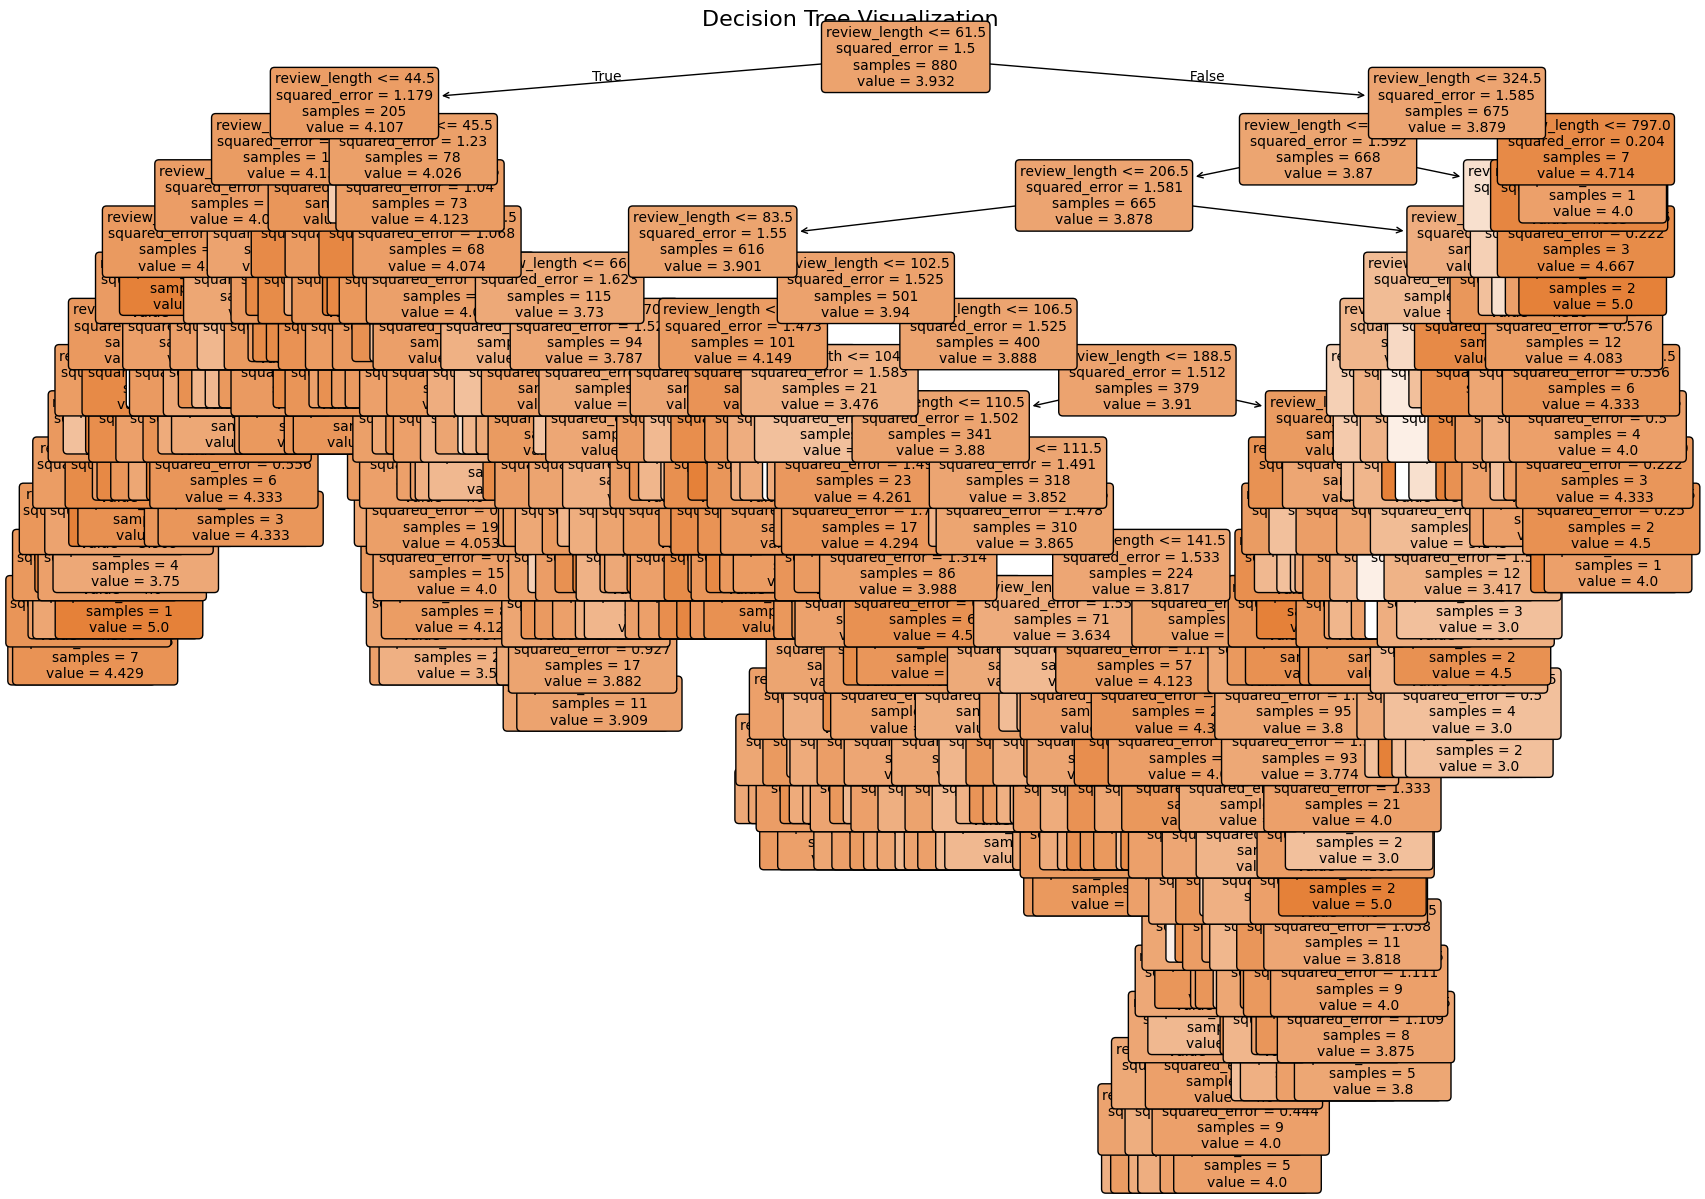

In [39]:
#ploting tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(model_dt, 
          feature_names=['predicted_sentiment', 'review_length'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [68]:
import pandas as pd
import sqlite3

# Step 1: reviews.csv file se DataFrame load karein
# Ensure karein ki 'reviews.csv' file aapki Jupyter Notebook ki directory mein hai
try:
    df = pd.read_csv('reviews.csv')
    print("reviews.csv file successfully load ho gayi hai.")
except FileNotFoundError:
    print("Error: reviews.csv file nahi mili. Kripya file ko sahi directory mein rakhein.")
    exit()

# Step 2: Ek in-memory SQLite database connection banayein
conn = sqlite3.connect(':memory:')

# ---- 'reviews' table banayein aur data daalein ----
# DataFrame se 'reviews' table mein data daalein
df.to_sql('reviews', conn, index=False)

# ---- 'restaurants' table banayein aur data daalein ----
# Unique business_name ki list nikal kar ek alag table banayein
restaurants_df = pd.DataFrame(df['business_name'].unique(), columns=['business_name'])
restaurants_df['restaurant_id'] = restaurants_df.index + 1 # Ek unique ID banayein
restaurants_df.to_sql('restaurants', conn, index=False)

print("In-memory database aur tables taiyar hain.\n")

# Step 3: SQL Queries Run Karein
# Query 1: Tables ko JOIN karna
print("--- JOIN Query: 'reviews' aur 'restaurants' tables ko jodna ---")
join_query = """
SELECT
    r.author_name,
    r.text,
    res.restaurant_id,
    res.business_name
FROM
    reviews r
JOIN
    restaurants res ON r.business_name = res.business_name
LIMIT 5;
"""
joined_df = pd.read_sql(join_query, conn)
print(joined_df)
print("\n" + "="*50 + "\n")

# Query 2: Har restaurant ki Average Rating nikalna
print("--- GROUP BY Query: Har restaurant ki average rating ---")
avg_rating_query = """
SELECT
    business_name,
    AVG(rating) AS average_rating
FROM
    reviews
GROUP BY
    business_name
ORDER BY
    average_rating DESC;
"""
avg_rating_df = pd.read_sql(avg_rating_query, conn)
print(avg_rating_df.head())
print("\n" + "="*50 + "\n")

# Query 3: Specific rating (5-star) ki reviews filter karna
print("--- WHERE Query: Sirf 5-star ratings wali reviews ---")
five_star_query = """
SELECT
    business_name,
    author_name,
    text
FROM
    reviews
WHERE
    rating = 5
LIMIT 5;
"""
five_star_df = pd.read_sql(five_star_query, conn)
print(five_star_df)
print("\n" + "="*50 + "\n")

# Database connection band karna
conn.close()

reviews.csv file successfully load ho gayi hai.
In-memory database aur tables taiyar hain.

--- JOIN Query: 'reviews' aur 'restaurants' tables ko jodna ---
     author_name                                               text  \
0    Gulsum Akar  We went to Marmaris with my wife for a holiday...   
1  Oguzhan Cetin  During my holiday in Marmaris we ate here to f...   
2     Yasin Kuyu  Prices are very affordable. The menu in the ph...   
3     Orhan Kapu  Turkey's cheapest artisan restaurant and its f...   
4     Ozgur Sati  I don't know what you will look for in terms o...   

   restaurant_id                    business_name  
0              1  Haci'nin Yeri - Yigit Lokantasi  
1              1  Haci'nin Yeri - Yigit Lokantasi  
2              1  Haci'nin Yeri - Yigit Lokantasi  
3              1  Haci'nin Yeri - Yigit Lokantasi  
4              1  Haci'nin Yeri - Yigit Lokantasi  


--- GROUP BY Query: Har restaurant ki average rating ---
                     business_name  average_ra

In [69]:
# saving final dataframe into csv
df.to_csv('final_restaurant_data.csv', index=False)